In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Exploratory Data Analysis(EDA)

First we have to import the data so that we can do our analysis on it.

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Data

Now we need to know what missing data are we having in our DATASET. We can use Seaborn to create a heatmap of the missing data in our DATASET

In [4]:
#we can use isnull() metoid to find the null values in the dataset
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

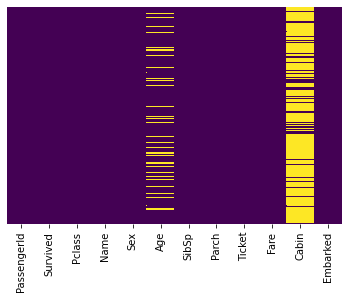

In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

C:\Users\stewa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

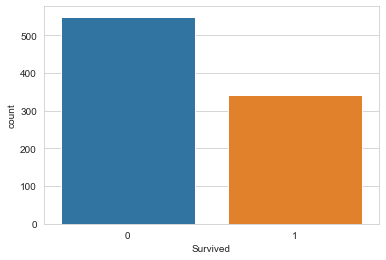

In [6]:
sns.set_style('whitegrid')
sns.countplot('Survived', data=train)

C:\Users\stewa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

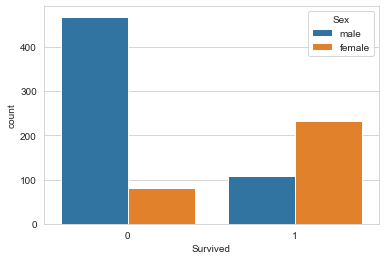

In [7]:
sns.set_style('whitegrid')
sns.countplot('Survived', data=train, hue='Sex')

C:\Users\stewa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

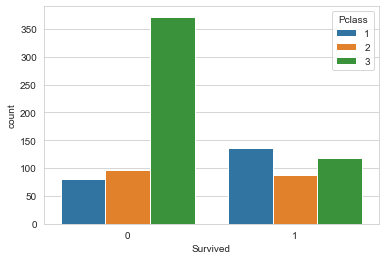

In [8]:
sns.set_style('whitegrid')
sns.countplot('Survived', data=train, hue='Pclass')

C:\Users\stewa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

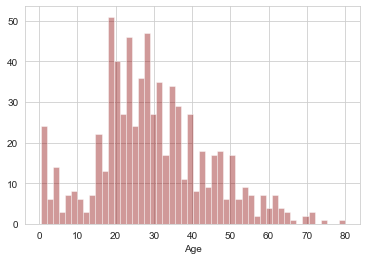

In [9]:

sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=50)

C:\Users\stewa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

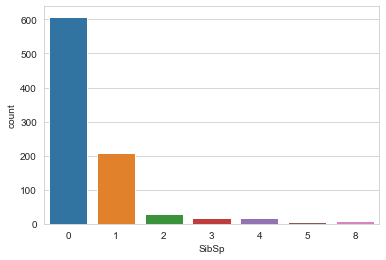

In [10]:
sns.countplot('SibSp',data=train)

# Data Cleaning
We can do 2 things with missing data
- We can fill in the missing data by analyzing how it correlates with other columns in the DATASET.
- We can remove the column, if after analyzing we conclude that the missing data will not affect our outcome signficantly.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

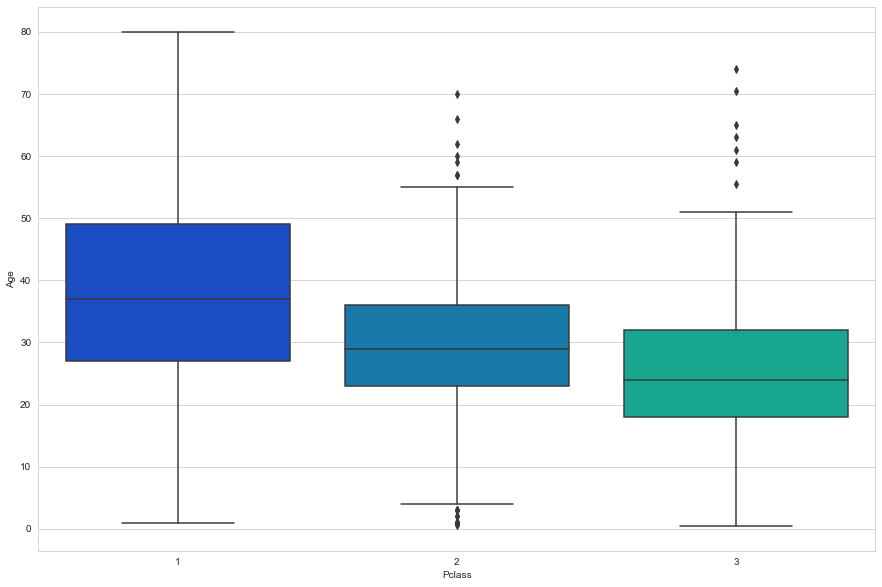

In [11]:
plt.figure(figsize=(15,10))
sns.boxplot(x='Pclass',y='Age', data=train, palette='winter')

In [12]:
#we are creating a funtion which will return the value of age based on the pClass of the DATASET
#we found this correlation between them by lookin in the above box plot between them
# we have taken the mean age of the each pclass and assigned them to the missing age data

def impute_age(col):
    age = col[0]
    pClass = col[1]
    
    if pd.isnull(age):
        
        if pClass == 1:
            return 37
        
        if pClass == 2:
            return 29
        
        if pClass == 3:
            return 24
    else:
        return age

In [13]:
#we are copying the DF using copy method. if we don't use it then the new variable will refrence the original address.

train_age = train.copy()

In [14]:
#we are replacing the missing values in the Age column using impute_age funciton

train_age['Age'] = train[['Age', 'Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

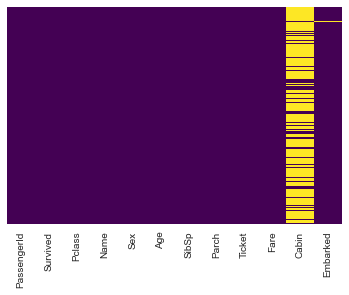

In [15]:
# now after modifying the our df we can see the heatmap to see how the data is affected..

sns.heatmap(train_age.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
#we are dropping the column Cabin from our DF.

train_age.drop('Cabin', axis=1, inplace=True)

In [17]:
train_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

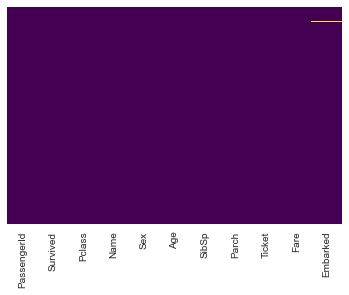

In [18]:
# after dropping the Cabin column we now viusualize the heatmap.
sns.heatmap(train_age.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
# In the above heatmap we are able to see that there are few rows where data is missing in Embarked column 
# s we are dropping those
train_age.dropna(inplace=True)

<AxesSubplot:>

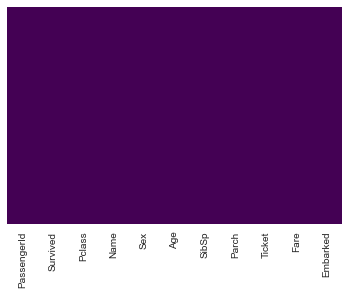

In [20]:
# after dropping the rows with missing data we now viusualize the heatmap.
sns.heatmap(train_age.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [21]:
train_age['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
pd.get_dummies(train_age['Embarked'],drop_first=True,).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [23]:
# here we covert the Categorical features Embarked and Sex into dummies
embarked = pd.get_dummies(train_age['Embarked'],drop_first=True)
sex = pd.get_dummies(train_age['Sex'],drop_first=True)

In [24]:
# here we drop the column 'Sex','Embarked','Name','Ticket' from the DF as we don't need them.
# 'PassengerId'
train_age.drop(['PassengerId','Sex','Embarked','Name','Ticket'], axis=1, inplace=True)

In [25]:
train_age.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [26]:
train_age = pd.concat([train_age,sex,embarked],axis=1)

In [27]:
train_age.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Now our data is ready for our model!

# Building a Logistic Regression Model

Let's start by spliting our data into a tranning set and test set

## Train Test Split

In [28]:
train_age.drop('Survived', axis=1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [29]:
train_age['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaling  = MinMaxScaler()

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(train_age.drop('Survived', axis=1),
                                                                   train_age['Survived'],
                                                                   test_size = 0.30,
                                                                   random_state = 101 )

## Training and Predicting


In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logmodel = LogisticRegression(solver='liblinear',multi_class='ovr', n_jobs=1,max_iter=100)
logmodel.fit(X_train, Y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [57]:
predictions = logmodel.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
accuracy = confusion_matrix(Y_test,predictions)

In [60]:
accuracy

array([[148,  15],
       [ 36,  68]], dtype=int64)

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy2 = accuracy_score(Y_test,predictions)
accuracy2
#0.8202247191011236 with 'PassengerId'
#0.8277153558052435 with StandardScaler
#0.8089887640449438 with min max

0.8089887640449438

In [40]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)